---
title: "30 Day Map Challenge 2024 - Day 6: Raster"
categories:
  - Project
tags:
  - 30daymapchallenge
  - python
  - programming
classes: wide
header:
  teaser: /assets/images/30daymapchallenge2024-day6.png
---

The theme for day six is _Raster_:
> A map using raster data. Rasters are everywhere, but today’s focus is purely on grids and pixels - satellite imagery, heatmaps, or any continuous surface data. 

### Data

Today, I will again use data from [Dresden OpenDataPortal](https://opendata.dresden.de/informationsportal/), specifically the data of the [digital terrain model](https://opendata.dresden.de/informationsportal/?open=1&result=9F7A6477F63840F791F7CCD50C6CD9CF#app/mainpage) with a resolution of 1 meter.
The data is provided in GeoTIFF format, a special kind of the TIF image format with additional georeferencing information embedded, like projection, coordinate system, ellipsoids, etc.

## Implementation

Besides the well-known data handling and plotting libraries, we will use `rasterio` for loading the GeoTIFF file:

In [10]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.patches as patches
import numpy as np

from utils import read_dresden_csv

In [7]:
rasterio.control.GroundControlPoint(col=1612, row=2077, x=30, y=51)
rasterio.control.GroundControlPoint(col=3034, row=2086, x=31, y=51)
rasterio.control.GroundControlPoint(col=4452, row=2080, x=32, y=51)
rasterio.control.GroundControlPoint(col=1596, row=3210, x=30, y=50.5)
rasterio.control.GroundControlPoint(col=3031, row=3222, x=31, y=50.5)
rasterio.control.GroundControlPoint(col=3031, row=3222, x=31, y=50.5)

GroundControlPoint(row=3222, col=3031, x=31, y=50.5, id='0b3764d7-cdf8-4660-b687-39eb979166d4')

The whole area of Dresden city lays more than 100 meters above mean sea level.
Any point of the rectangular raster in the GeoTIFF image that is beyond the city's boundary has a height value of 0.
Therefore we can use this value to mask the data array and thus exclude these points from further calculations, especially for the colorbar scaling.

Again we also load the city's boundary, as well as street data to add some background information to the map and improve orientation.
This time, we have to adapt the coordinate reference system (CRS), ensuring all data uses the same map projection.

In [11]:
dataset = rasterio.open("data/dresden/DGM1_geotiff/DGM1_Dresden.tif")
data = dataset.read()
data_masked = np.ma.masked_values(data[0, ::100, ::100], 0.0)

# gdf_city_boundary = read_dresden_csv("data/dresden/city_boundary.csv", geometry_column="shape").to_crs(dataset.crs)
# gdf_streets = read_dresden_csv("data/dresden/verkehrswege.csv", geometry_column="shape").to_crs(dataset.crs)

Mapping of the data is straight forward and the code should be rather self-explanatory.
Since pyplot's image plot function `imshow` uses array indices for x and y coordinates, the `extent` parameter has to be set to reflect the actual bounds of the image in terms of real coordinates.
After plotting the image, we clip it to the city's boundary and add additional information by plotting the road network.

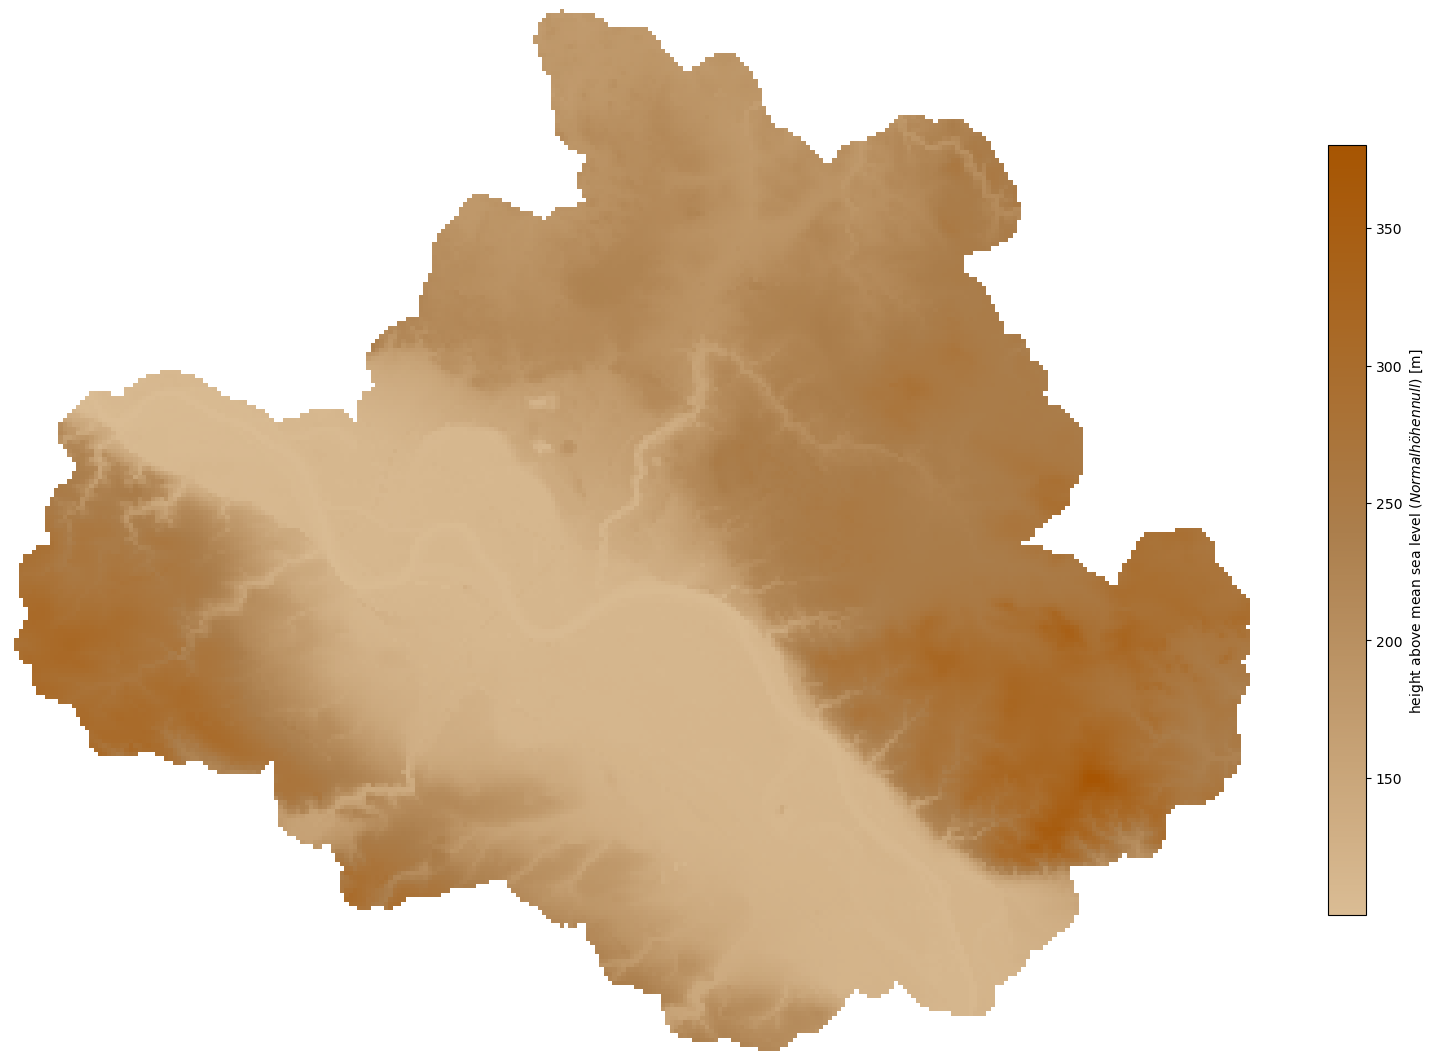

In [ ]:
cmap = clrs.LinearSegmentedColormap.from_list("", ["#e9dfd4dabc94", "#c49e78", "#ab7e4c", "#", "#a75502"])
cmap.set_under(alpha=0)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

image = plt.imshow(
    data_masked,
    cmap=cmap,
    extent=(
        dataset.bounds.left,
        dataset.bounds.right,
        dataset.bounds.bottom,
        dataset.bounds.top,
    ),
)
# image.set_clip_path(
#     patches.Polygon(
#         np.array(gdf_city_boundary["shape"][0].exterior.xy).T,
#         closed=False,
#         transform=ax.transData,
#     )
# )

# gdf_city_boundary["shape"].plot(
#     edgecolor="black",
#     facecolor="none",
#     ax=ax,
# )

# gdf_streets["shape"].plot(edgecolor="white", lw=0.5, ax=ax)

plt.colorbar(
    shrink=0.5, label=r"height above mean sea level ($\it{Normalhöhennull}$) [m]"
)
ax.axis("off")

plt.show()